In [498]:
import numpy as np
import matplotlib.pyplot as plt     #plt.imshow para mostar imagens na tela
from PIL import Image               # Image.open para carregar imagens
from scipy.signal import convolve2d



$Métodos$ $apenas$ $para$ $exibição$ $de$ $imagens$ 

In [499]:
def showImage(imag, title, size):
    axis = plt.subplots(figsize = size)

    axis.imshow(imag,'gray')
    axis.set_title(title, fontdict = {'fontsize':22,'fontweight':'medium'})
    plt.show()

def showImages(imagArray,titleArray, size, x,y):
    if(x<1 | y<1):
        print('ERRO: x e y não podem ser zero ou abaixo de zero.')
        return
    elif(x==1 & y==1):
        showImage(imagArray, titleArray)
    elif(x==1):
        fig, axis = pltsubplots(y, figsize = size)
        yId = 0
        for imag in imagArray:
            axis[yId].imshow(imag,'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titleArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1

    elif(y ==1):
        fig, axis = plt.subplots(1,x,figsize = size)
        fig.suptitle(titleArray)
        xId = 0
        for imag in imagArray:
            axis[xId].imshow(imag,'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titleArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1

    else:
        fig, axis = plt.subplots(y,x,figsize =size)
        xId, yId, titleId = (0,0,0)
        for imag in imagArray:
            axis[yId,xId].imshow(imag,'gray')
            #axis[yId,xId].set_anchor('NW')
            axis[yId,xId].set_title(titleArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            if len(titleArray[titleId])==0:
                axis[yId,xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

In [513]:
# cores básicas 
red   = (255,0,0)
green = (0,255,0)
blue  = (0,0,255)
black = (0,0,0)
white = (255,255,255)

# alguns filtros de convolução 
blurFilter = np.array(
    [
        [2, 4, 5, 4, 2],
        [4, 9, 12, 9, 4],
        [5, 12, 15, 12, 5],
        [4, 9, 12, 9, 4],
        [2, 4, 5, 4, 2]
    ]
)

# Filtro detector de borda
borderFilter = np.array(
     [
        [ 0, -4,  0],
        [-4, 8, -4],
        [ 0, -4,  0]
    ]
)

sobelFilter = np.array(
        [[47, 0,-47], 
         [162, 0, -162], 
         [47, 0, -47]]
)

# Desfoque de caixa ou Filtro Linear de Caixa; Filtro Passa Baixa
# O parâmetro d deve ser preferencialmente ímpar; d >= 3
d = 5
boxBlurFilter = np.ones((d,d))


In [501]:
# leitura dos parâmetros
in_Name    = input('Nome do Arquivo de entrada:')
format_    = input('Formato da imagem[exemplo: .png; .jpg]:')
radius     = int(input('Raio desejado para o Filtro de Mediana(Número inteiro, ímpar):'))
threshold  = int(input('Limiar desejado (Número inteiro):'))
    
print('Imagem de Entrada...:', in_Name+format_)
print('Raio da Mediana.....: ',radius)
print('LIMIAR(threshold)...: ',threshold)
    
original_imag = Image.open(in_Name+format_)    

# segmentação das boradas ----------------------------------------------------------------------------------------
#edges = blurred.segmentEdges(threshold) 
#print('Imagem das bordas Segmentadas: ')
#edges.show()


# realce das bordas na imagem original ----------------------------------------------------------------------------
#painted = in_imag.paint(black, edges) 
#print('Imagens com bordas realçadas')
#painted.show()


# Salvar o resultado -----------------------------------------------------------------------------------------------
#painted.saved(out_Name)
#print('A imagem realçada foi salva em', out_Name)


Imagem de Entrada...: rodovia.jpg
Raio da Mediana.....:  7
LIMIAR(threshold)...:  200


$Método$ $Níveis$ $de$ $Cinza$

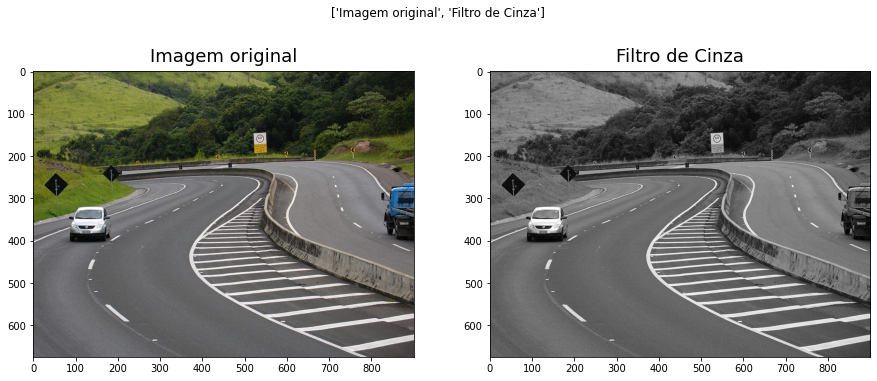

In [502]:
def toGray(file): 

    rgb     = file
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray    = (0.2126 * r) + (0.7152 * g) + (0.0722 * b)

    return gray

gray    = toGray(np.array(original_imag))
legenda = ['Imagem original', 'Filtro de Cinza']
showImages([original_imag,gray], legenda, (15,9), 2, 1)

$Método$ $Filtro$ $de$ $Mediana$

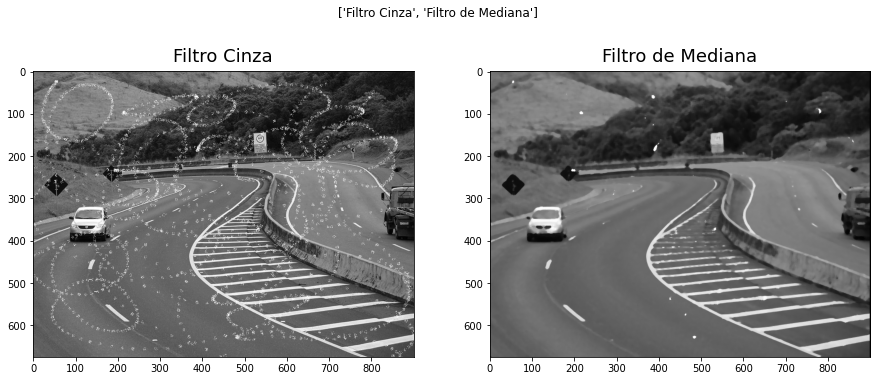

In [510]:
def filterMedian(file, filter_size):
    temp = []
    indexer = filter_size // 2
    file_final = []
    file_final = np.zeros((len(file),len(file[0])))
    for i in range(len(file)):

        for j in range(len(file[0])):

            for z in range(filter_size):
                
                if i + z - indexer < 0 or i + z - indexer > len(file) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(file[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(file[i + z - indexer][j + k - indexer])

            temp.sort()
            file_final[i][j] = temp[len(temp) // 2]
            temp = []
    return file_final

# Filtro de Mediana --------------------------------------------------------------------------------------------

inputIm2gray2 = in_Name+'Noise'+format_
gray2         = toGray(np.array(Image.open(inputIm2gray2)))
img           = gray2
arr           = np.array(img)
removed_noise = filterMedian(arr, radius) 
img_median    = Image.fromarray(removed_noise)
legenda       = ['Filtro Cinza', 'Filtro de Mediana']
showImages([gray2,img_median], legenda, (15,9), 2, 1)

$Método$ $Filtro$ $de$ $Media$

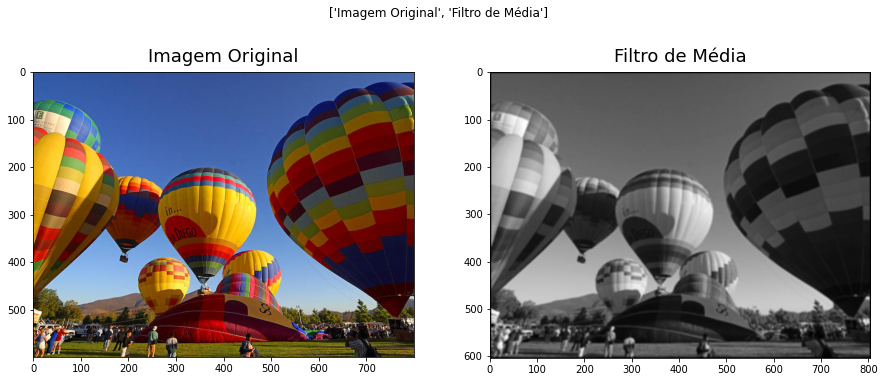

In [504]:
def filterMean(file, filter_): 
    # (self, ndarray) >>> Imagem Cinza. Este Método retorna uma imagem da convolução de Self com o filtro.
    # Como os valores do filtro são reais, os valores da imagem resultado também serão reais.
    A          = file
    B          = filter_
    imFiltered = convolve2d(A,B)
    return imFiltered

# Filtro de Média -----------------------------------------------------------------------------------------------
im        = Image.open('baloes.jpg')
kernelBBF = boxBlurFilter/boxBlurFilter.sum()
grayIm    = toGray(np.array(im))
blur      = filterMean(grayIm,kernelBBF)
legendas  = ['Imagem Original','Filtro de Média']
showImages([im,blur],legendas, (15,9) ,2,1)



$Método$ $Imagem$ $Binarizada$

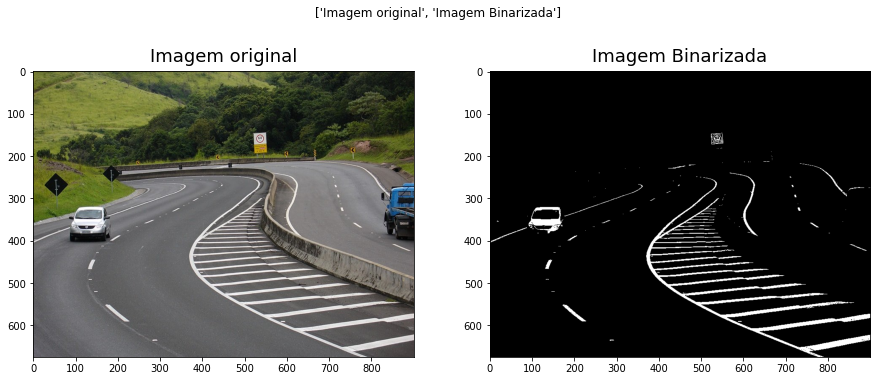

In [505]:
def binarize(file, threshold): 
    # (file, inteiro) >>> retorna uma imagem convertida para binário. 
    rgbBin = file
    for row in range(0, rgbBin.shape[0]):
        for col in range(0, rgbBin.shape[1]):
            if (rgbBin[row][col] <= threshold).any():
                rgbBin[row,col] = 0
            else:
                rgbBin[row,col] = 255
                
    return rgbBin

# imagem Binarizada --------------------------------------------------------------------------------------------
rgbBin  = binarize(gray,threshold)
legenda = ['Imagem original', 'Imagem Binarizada']
showImages([original_imag,rgbBin], legenda, (15,9), 2, 1)

$Outros$ $Filtros$

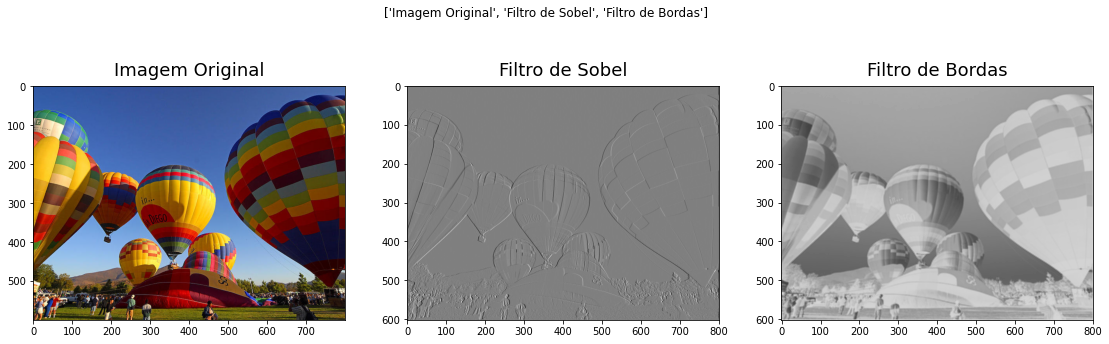

In [514]:
# Outros Filtros -------------------------------------------------------------------------------------------------

blurSobel     = filterMean(grayIm,sobelFilter)
border_filter  = filterMean(grayIm,borderFilter)
legendas = ['Imagem Original','Filtro de Sobel','Filtro de Bordas']
showImages([im,blurSobel,border_filter],legendas, (19,11) ,3,1)

$Método$ $Colorir$ $Bordas$

Falta fazer

In [ ]:
def paint(file, color, mask): 
    # (file, cor, Imagem) >>> Imagem; Recebe uma imagem binária e pinta os pixels de self correspondentes aos pixels Trfue da mascara com a cor.
    # Obeservar  que a cor  deve ter o mesmo numero de bits da imagem em file.

$Método$ $Segmentar$ $Bordas$

Falta fazer

In [ ]:
def segmentEdges(file, threshold): 
    '''
    Assumir que self é uma imagem com níveis de cinza. 
    O método calcula as matrizes gradiente gH e gV
    utilizando os filtros Sh e Sv de Sobel, e retorna uma imagem 
    binária com as mesmas dimensões da imagem cinza file, 
    onde os valores True satisfazem:
    sqrt(gH*gH + gV*gV) > limiar.
    Pixels que não satisfazem a condições devem receber False.

    Importante: como o limiar é um número entre 0 e 255,
    antes de aplicar o limiar (comparar), a imagem correspondente ao 
    módulo do gradiente (sqrt(gH*gH + gV*gV)) deve ser normalizada para
    o intervalo 0 a 255.
    '''

